<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# OpenCV Library


----


Download the image for the lab:


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

In [1]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [2]:
my_image = "lenna.png"

In [3]:
import os
cwd = os.getcwd()
cwd 

'/home/pampa/Coursera/Week2'

The "path" to an image can be found using the following line of code.


In [4]:
image_path = os.path.join(cwd, my_image)
image_path

'/home/pampa/Coursera/Week2/lenna.png'

## Load in Image in Python


In [5]:
import cv2

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [7]:
image = cv2.imread(my_image)

In [43]:
type(image)

numpy.ndarray

We can get the shape of the array from the `shape` attribute.


In [9]:
image.shape

(512, 512, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


In [10]:
image.max()

255

and


In [11]:
image.min()

3

##  Plotting an Image 


In [ ]:
cv2.imshow('image', image)  #opens the image in new window.
cv2.waitKey(0)  #wait for infinite time until a key is pressed.
cv2.destroyAllWindows() 

In [12]:
import matplotlib.pyplot as plt

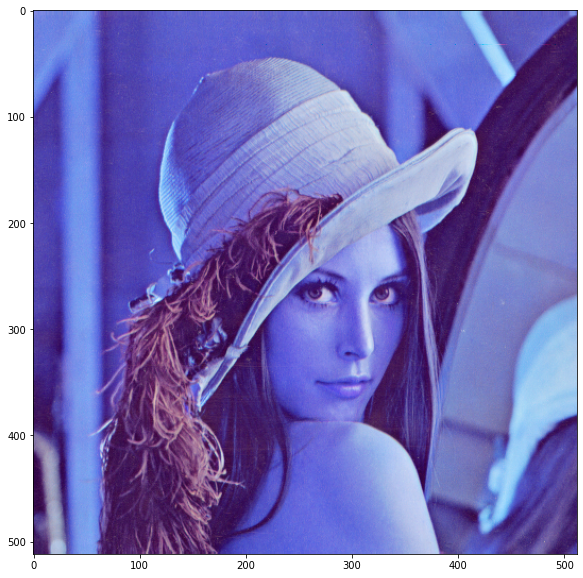

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image)  #image is the openCV object.
plt.show()

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [ ]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_image

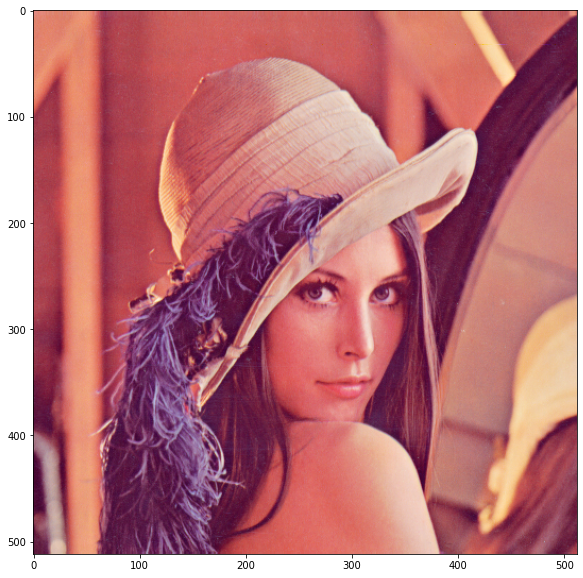

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

In [ ]:
image = cv2.imread(image_path)  # we can also load the image using it's full path.


You can save the image as in `jpg` format.


In [14]:
cv2.imwrite("lenna.jpg", image)

True

### Grayscale Images


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [19]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The image array has only two dimensions, i.e. only one color channel:
Gray has one channel with different shades and RGB has 3 channels.


In [59]:
image_gray.shape

(512, 512)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')  # we have to specify the color map is grey.
plt.show()

In [22]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)  #saving the greyscale image in jpg format. 

True

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [61]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray

array([[181, 201, 202, ..., 103, 102,  92],
       [171, 198, 201, ...,  94,  96,  96],
       [175, 195, 193, ...,  87,  96,  98],
       ...,
       [100,  97,  97, ..., 114, 113, 117],
       [ 94,  97,  99, ..., 111, 112, 114],
       [ 96,  95,  98, ..., 113, 104, 109]], dtype=uint8)

### Color Channels  


We can also work with the different color channels. Consider the following image:


In [ ]:
baboon=cv2.imread('baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [17]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [ ]:
im_bgr = cv2.vconcat([blue, green, red])
im_bgr

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

### Indexing  


If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


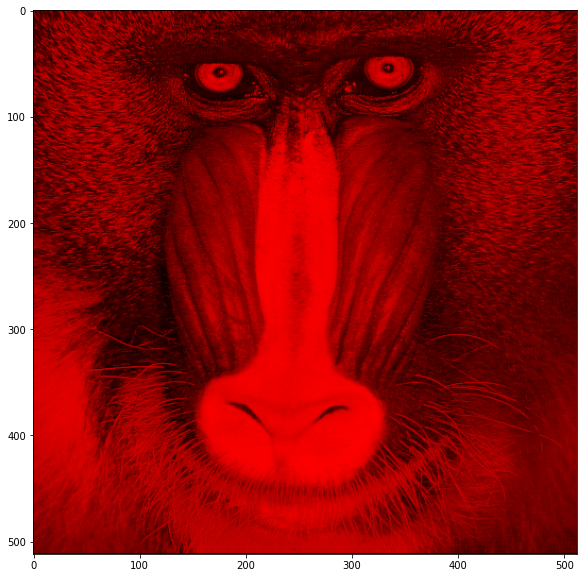

In [35]:
baboon_red = baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for blue:  


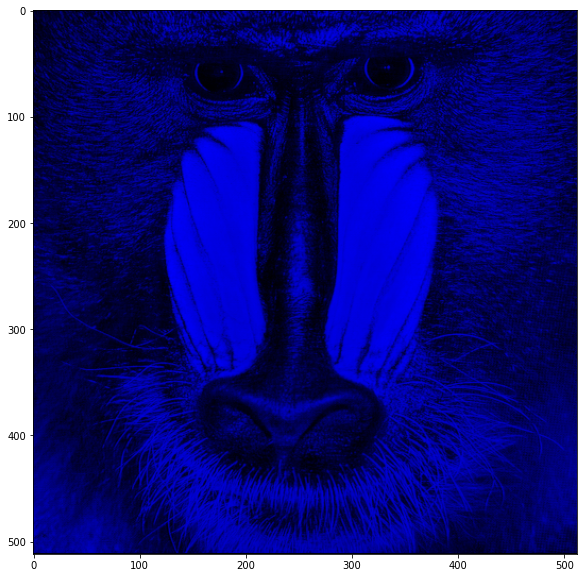

In [36]:
baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

### Question 1: 
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a OpenCV Image object called `baboon_blue`, convert the image from BGR format to RGB format, get the blue channel out of it, and finally plot the image




baboon_blue=cv2.imread('baboon.png')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()


